In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading data

In [2]:
#Table 1
orders_channels = pd.read_csv("orders_channels.csv")
orders_channels.shape

(2054059, 3)

In [3]:
orders_channels.head(5)

,id,date,channel_id
0,10173,2017-06-12,39.0
1,95062,2017-09-11,35.0
2,171081,2017-07-05,39.0
3,122867,2017-08-18,39.0
4,107186,2017-11-23,NaN


In [4]:
orders_channels['id'].nunique()

1970544

In [5]:
orders_channels['id'].value_counts()

114204     3
509515     3
100966     3
1423305    3
191749     3
1653526    3
123091     3
396551     3
1118421    3
1249865    3
198198     3
684795     3
1742795    3
158080     3
1435601    3
1163057    3
862588     3
169493     3
621415     3
1418626    3
832251     3
464759     3
411664     3
856213     3
77122      3
1028776    3
1195645    3
1545897    3
97615      3
1132456    3
          ..
52484      1
1029355    1
1031402    1
1025257    1
931035     1
945360     1
943313     1
691867     1
689818     1
937172     1
935125     1
941270     1
939223     1
928984     1
926937     1
933082     1
920796     1
1027304    1
695961     1
924894     1
922847     1
693912     1
1041633    1
1047778    1
1045731    1
1035492    1
1033445    1
1039590    1
1037543    1
377671     1
Name: id, Length: 1970544, dtype: int64

In [6]:
orders_channels[orders_channels['id'] == 114204] 

,id,date,channel_id
705918,114204,2017-01-03,39.0
1845108,114204,2017-01-03,39.0
1845109,114204,2017-01-03,39.0


In [7]:
orders_channels = orders_channels.drop_duplicates().reset_index(drop=True)
orders_channels.shape
#Lot of duplicates

(1970544, 3)

In [8]:
#Table 2
orders_tickets = pd.read_csv("orders_tickets.csv")
orders_tickets.shape

(1999716, 3)

In [9]:
# orders_tickets = orders_tickets.drop(['type'], axis=1)
orders_tickets.groupby(['id'])['n_tickets'].sum()
orders_tickets.head(5)

,id,n_tickets,type
0,1586391,2,pax
1,438232,2,pax
2,270896,1,pax
3,1181593,2,pax
4,964842,1,pax


In [10]:
orders_tickets.shape

(1999716, 3)

In [11]:
orders_tickets['id'].nunique()

1970544

In [12]:
orders_tickets[orders_tickets['id'] == 1212180] 

,id,n_tickets,type
102327,1212180,1,other
403818,1212180,3,pax
732654,1212180,2,pax


In [13]:
orders_tickets = orders_tickets.groupby(['id']).sum()
orders_tickets['id'] = orders_tickets.index

In [14]:
orders_tickets[orders_tickets['id'] == 1212180] 

,n_tickets,id
id,,
1212180,6,1212180


In [15]:
orders_tickets.reset_index(drop=True, inplace=True)

In [16]:
orders_tickets.shape

(1970544, 2)

In [17]:
orders_country = pd.read_csv("orders_country.csv")
orders_country.shape

(1917668, 3)

In [18]:
orders_country.head(5)

,id,country_1,country_2
0,10503,24.0,NaN
1,79360,24.0,0
2,81388,24.0,15
3,82828,24.0,9
4,38756,23.0,NaN


In [19]:
orders_country['id'].nunique()

1917668

In [20]:
orders_country[['country_1','country_2']].isnull().sum()

country_1     17831
country_2    748932
dtype: int64

In [21]:
orders_country['country_1'] = orders_country['country_1'].fillna(orders_country['country_2'])

In [22]:
orders_country[['country_1','country_2']].isnull().sum()

country_1      6873
country_2    748932
dtype: int64

In [23]:
# orders_tickets[orders_tickets['id']==399415]

In [24]:
# orders_channels[orders_channels['id']==399415]

In [25]:
# orders_country[orders_country['id']==399415]

In [26]:
## Asumption:
# 1. One order id has one date, one country, one channel but can have multiple n_tickets
# 2. Found that there are duplicate order id because the n_tickets are different  but order id channel, date is same
# 3. Found that there can be same values in all columns 
# except type column which in this case is neither required in the final answer. 
# so i grouped using order id and considered same type for all tickets

### Merging and cleaning data

In [27]:
# Merging dataframes
merged_Frame = pd.merge(orders_channels,orders_tickets, on = 'id')
# because number of unique order ids was 1970544 in the orders_channels df and order_tickets df 
merged_Frame.shape

(1970544, 4)

In [28]:
merged_Frame['id'].nunique()

1970544

In [29]:
merged_Frame[merged_Frame['id']==1642123]

,id,date,channel_id,n_tickets
1969349,1642123,2017-12-12,37.0,2


In [30]:
df = merged_Frame.copy()

In [31]:
data = pd.merge(merged_Frame, orders_country, on = 'id')
df1 = data.copy()
df1.shape

(1917668, 6)

In [32]:
df1.info()
#The number of orders are more in orders table and n_tickets table w.r.t country table.
# So some orders are left in this data merge

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917668 entries, 0 to 1917667
Data columns (total 6 columns):
id            int64
date          object
channel_id    float64
n_tickets     int64
country_1     object
country_2     object
dtypes: float64(1), int64(2), object(3)
memory usage: 102.4+ MB


In [33]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')

In [34]:
# To check which columns have NA values
df.isnull().any()

id            False
date          False
channel_id     True
n_tickets     False
dtype: bool

In [35]:
df[df.duplicated(keep=False)]

,id,date,channel_id,n_tickets


In [36]:
# for country included datafarme
df1[df1.duplicated(keep=False)]

,id,date,channel_id,n_tickets,country_1,country_2


In [37]:
# To get total number of missing values in this column
df1[['country_1','country_2']].isnull().sum()

country_1      6873
country_2    748932
dtype: int64

In [38]:
df1['country_2'].value_counts(dropna = False)
# We see that there is a value 'xx' . I assumed that its a specific country

NaN    748932
8       60283
13      60193
15      60137
12      60130
18      60092
xx      60078
17      60005
7       59982
1       59972
20      59910
19      59892
3       59873
11      59847
9       59827
4       59818
14      59774
16      59756
6       59723
2       59647
0       29797
Name: country_2, dtype: int64

In [39]:
df1['country_1'] = df1['country_1'].fillna(df1['country_2'])

In [40]:
df1[['country_1','country_2']].isnull().sum()

country_1      6873
country_2    748932
dtype: int64

In [41]:
# df['type'] = df['type'].astype('category')
df1['country_1'] = df1['country_1'].astype('category')
df1['country_2'] = df1['country_2'].astype('category')
df['channel_id'] = df['channel_id'].astype('category')

In [42]:
df[df['id']==1642123]

,id,date,channel_id,n_tickets
1969349,1642123,2017-12-12,37.0,2


In [43]:
df.shape

(1970544, 4)

In [44]:
df.to_csv('Finaldata.csv')

### Time series

In [45]:
df = pd.read_csv('Finaldata.csv')
df_allcols = pd.merge(df,orders_country, on='id')
df_allcols.head()

,id,date,channel_id,n_tickets,country_1,country_2
0,10173,6/12/2017,39.0,2,24,NaN
1,95062,9/11/2017,35.0,1,12,NaN
2,171081,7/5/2017,39.0,1,4,11
3,122867,8/18/2017,39.0,1,24,17
4,107186,11/23/2017,NaN,2,12,20


In [46]:
df_allcols.shape

(1020652, 6)

In [47]:
#15 channels and 22 countries
df = pd.read_csv('Finaldata.csv')
df2 = df.copy()
df2.head()

,id,date,channel_id,n_tickets
0,10173,6/12/2017,39.0,2
1,95062,9/11/2017,35.0,1
2,171081,7/5/2017,39.0,1
3,122867,8/18/2017,39.0,1
4,107186,11/23/2017,NaN,2


In [48]:
df

,id,date,channel_id,n_tickets
0,10173,6/12/2017,39.0,2
1,95062,9/11/2017,35.0,1
2,171081,7/5/2017,39.0,1
3,122867,8/18/2017,39.0,1
4,107186,11/23/2017,NaN,2
5,171085,9/2/2017,NaN,1
6,169767,7/3/2017,28.0,1
7,80170,3/23/2017,39.0,1
8,154178,10/2/2017,37.0,1
9,3494,11/1/2017,28.0,1


In [49]:
df = df.drop(['id', 'channel_id'], axis=1)
df.head()

,date,n_tickets
0,6/12/2017,2
1,9/11/2017,1
2,7/5/2017,1
3,8/18/2017,1
4,11/23/2017,2


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
date         1048575 non-null object
n_tickets    1048575 non-null int64
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [51]:
df = df.groupby(['date']).sum()
df['date'] = df.index
df.reset_index(drop=True, inplace=True)

In [53]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')

In [54]:
df[df['date']== '2017-01-01']

,n_tickets,date
0,2234,2017-01-01


In [55]:

df = df.sort_values(by='date')
df = df.reset_index(drop=True)
df.to_csv('df.csv')

In [56]:
df.head()

,n_tickets,date
0,2234,2017-01-01
1,2866,2017-01-02
2,2444,2017-01-03
3,2409,2017-01-04
4,2407,2017-01-05


In [57]:
df.tail()

,n_tickets,date
417,2175,2018-02-22
418,2123,2018-02-23
419,1845,2018-02-24
420,2166,2018-02-25
421,2086,2018-02-26


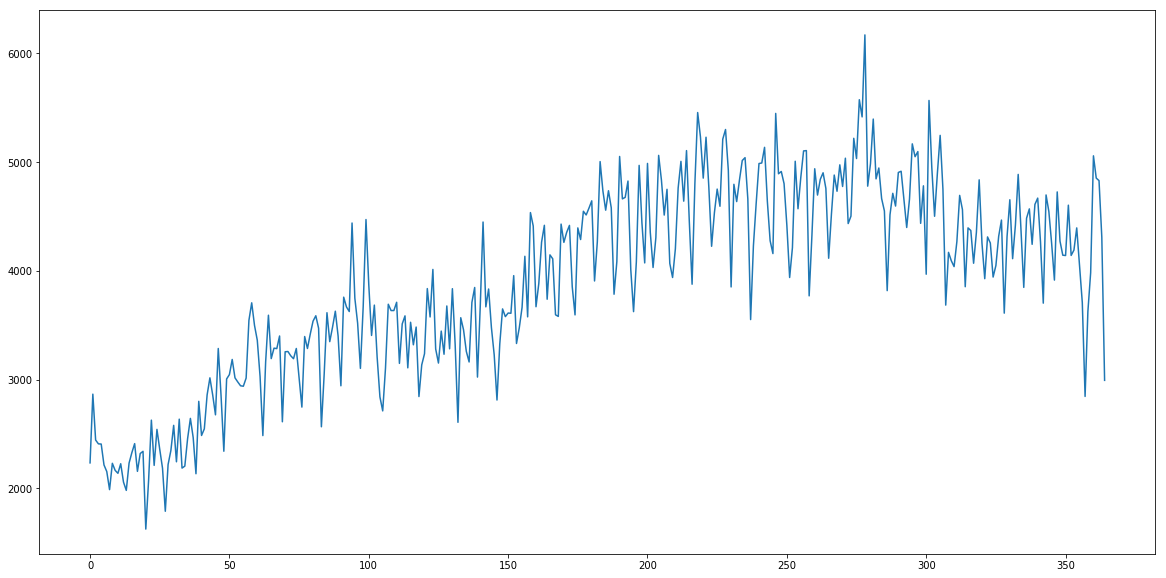

In [58]:
plt.figure(figsize=(20, 10))  # Set figsize to increase size of figure
plt.plot(df.n_tickets.values[:365])
# Plot to see the number of tickets in 365 days

In [80]:
# It shows that the sales are less during the beginning of year but increase in the summer months,
# remains almost steady and we see a sudden increase during holidays

In [67]:
df = df.set_index('date')
df.head()

,n_tickets
date,
2017-01-01,2234
2017-01-02,2866
2017-01-03,2444
2017-01-04,2409
2017-01-05,2407


In [68]:
df.to_csv('dataset.csv')

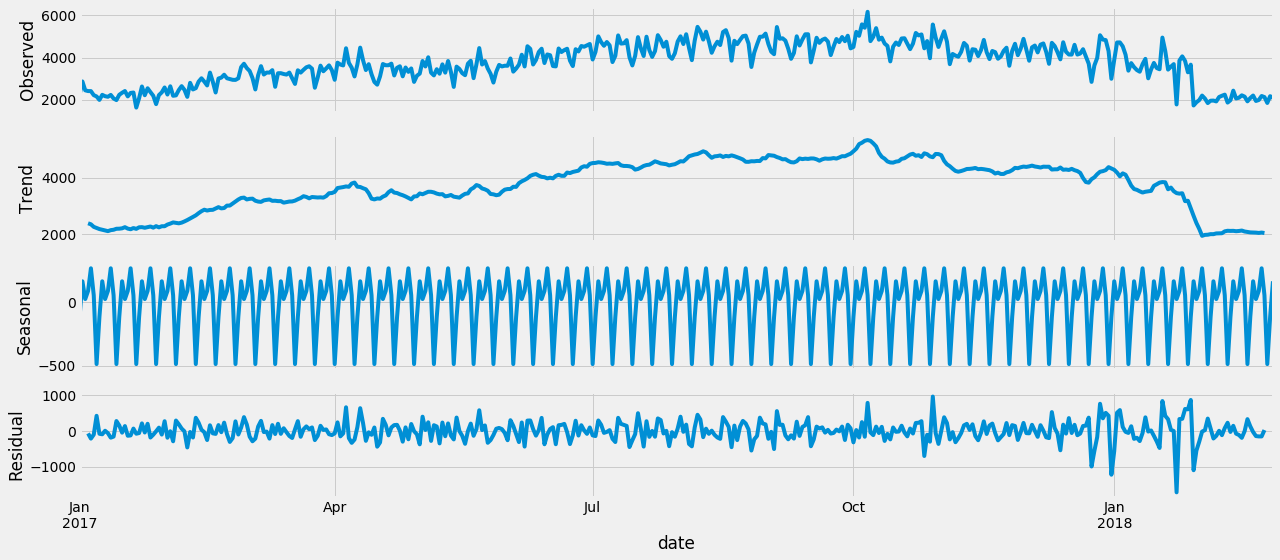

In [69]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

### Trial 1

In [217]:
#ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:
p = d = q = range(0, 10)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


In [ ]:
#Best params
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8153.808728531825
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7666.919479261165
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6964.57500742773
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:6675.157881912455
ARIMA(0, 0, 0)x(0, 0, 4, 12)12 - AIC:6305.65218040971
ARIMA(0, 0, 0)x(0, 0, 5, 12)12 - AIC:6009.556297283858
ARIMA(0, 0, 0)x(0, 0, 6, 12)12 - AIC:5915.846492561723
ARIMA(0, 0, 0)x(0, 0, 7, 12)12 - AIC:6612.240991035804
ARIMA(0, 0, 0)x(0, 0, 8, 12)12 - AIC:5859.077266288488
ARIMA(0, 0, 0)x(0, 0, 9, 12)12 - AIC:10902.723763975673
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6520.4619034828775
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6272.234185840143
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6079.555829700731
ARIMA(0, 0, 0)x(0, 1, 3, 12)12 - AIC:5889.2085678999465
ARIMA(0, 0, 0)x(0, 1, 4, 12)12 - AIC:5701.445106672048
ARIMA(0, 0, 0)x(0, 1, 5, 12)12 - AIC:5517.424478914147
ARIMA(0, 0, 0)x(0, 1, 6, 12)12 - AIC:5326.091971772767
ARIMA(0, 0, 0)x(0, 1, 7, 12)12 - AIC:5113.034034699083
ARIMA(0, 

ARIMA(0, 0, 0)x(1, 5, 4, 12)12 - AIC:5597.217840407261
ARIMA(0, 0, 0)x(1, 5, 5, 12)12 - AIC:6629.916075312394
ARIMA(0, 0, 0)x(1, 5, 6, 12)12 - AIC:6379.154029784197
ARIMA(0, 0, 0)x(1, 5, 7, 12)12 - AIC:6156.282862957612
ARIMA(0, 0, 0)x(1, 5, 8, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 5, 9, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 6, 0, 12)12 - AIC:6114.311482056783
ARIMA(0, 0, 0)x(1, 6, 1, 12)12 - AIC:5930.179356078389
ARIMA(0, 0, 0)x(1, 6, 2, 12)12 - AIC:5665.44487761337
ARIMA(0, 0, 0)x(1, 6, 3, 12)12 - AIC:5569.249123981463
ARIMA(0, 0, 0)x(1, 6, 4, 12)12 - AIC:5224.031047611972
ARIMA(0, 0, 0)x(1, 6, 5, 12)12 - AIC:6929.817559540668
ARIMA(0, 0, 0)x(1, 6, 6, 12)12 - AIC:6678.556205891486
ARIMA(0, 0, 0)x(1, 6, 7, 12)12 - AIC:7568.9765189115515
ARIMA(0, 0, 0)x(1, 6, 8, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 6, 9, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 7, 0, 12)12 - AIC:8339.858360117127
ARIMA(0, 0, 0)x(1, 7, 1, 12)12 - AIC:8213.808482271223
ARIMA(0, 0, 0)x(1, 7, 2, 12)12 - AIC:5707.0409007196395
ARIMA(0, 0

ARIMA(0, 0, 0)x(3, 1, 0, 12)12 - AIC:5913.888508011462
ARIMA(0, 0, 0)x(3, 1, 1, 12)12 - AIC:5896.4993340911515
ARIMA(0, 0, 0)x(3, 1, 2, 12)12 - AIC:5894.969672986186
ARIMA(0, 0, 0)x(3, 1, 3, 12)12 - AIC:5873.755629248757
ARIMA(0, 0, 0)x(3, 1, 4, 12)12 - AIC:5684.840179941493
ARIMA(0, 0, 0)x(3, 1, 5, 12)12 - AIC:5487.127026130561
ARIMA(0, 0, 0)x(3, 1, 6, 12)12 - AIC:5312.643750205663
ARIMA(0, 0, 0)x(3, 1, 7, 12)12 - AIC:5115.114766695116
ARIMA(0, 0, 0)x(3, 1, 8, 12)12 - AIC:4965.720145645981
ARIMA(0, 0, 0)x(3, 1, 9, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(3, 2, 0, 12)12 - AIC:5750.646245159793
ARIMA(0, 0, 0)x(3, 2, 1, 12)12 - AIC:5716.626880707191
ARIMA(0, 0, 0)x(3, 2, 2, 12)12 - AIC:5716.967565845921
ARIMA(0, 0, 0)x(3, 2, 3, 12)12 - AIC:5674.147761618431
ARIMA(0, 0, 0)x(3, 2, 4, 12)12 - AIC:5492.002016631774
ARIMA(0, 0, 0)x(3, 2, 5, 12)12 - AIC:5306.280741642893
ARIMA(0, 0, 0)x(3, 2, 6, 12)12 - AIC:5135.0404723294405
ARIMA(0, 0, 0)x(3, 2, 7, 12)12 - AIC:4898.75504706814
ARIMA(0, 0, 0)x(3, 2, 8

ARIMA(0, 0, 0)x(4, 6, 5, 12)12 - AIC:6322.664385578795
ARIMA(0, 0, 0)x(4, 6, 6, 12)12 - AIC:6070.500547920503
ARIMA(0, 0, 0)x(4, 6, 7, 12)12 - AIC:7354.5875422107365
ARIMA(0, 0, 0)x(4, 6, 8, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(4, 6, 9, 12)12 - AIC:nan


In [72]:
#Take a parameter values with lowest AIC
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(10, 1, 10),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4573      5.469     -0.084      0.933     -11.177      10.262
ar.L2         -0.3028      3.447     -0.088      0.930      -7.058       6.453
ar.L3         -0.3103      1.936     -0.160      0.873      -4.105       3.485
ar.L4         -0.0605      2.187     -0.028      0.978      -4.347       4.226
ar.L5         -0.4779      1.116     -0.428      0.669      -2.666       1.710
ar.L6         -0.0394      2.679     -0.015      0.988      -5.290       5.212
ar.L7          0.5591      1.175      0.476      0.634      -1.745       2.863
ar.L8          0.2950      3.351      0.088      0.930      -6.272       6.862
ar.L9          0.0627      2.251      0.028      0.978      -4.350       4.475
ar.L10        -0.0322      0.379     -0.085      0.932      -0.774       0.710
ma.L1         -0.1352      5.486     -0.025      0.9

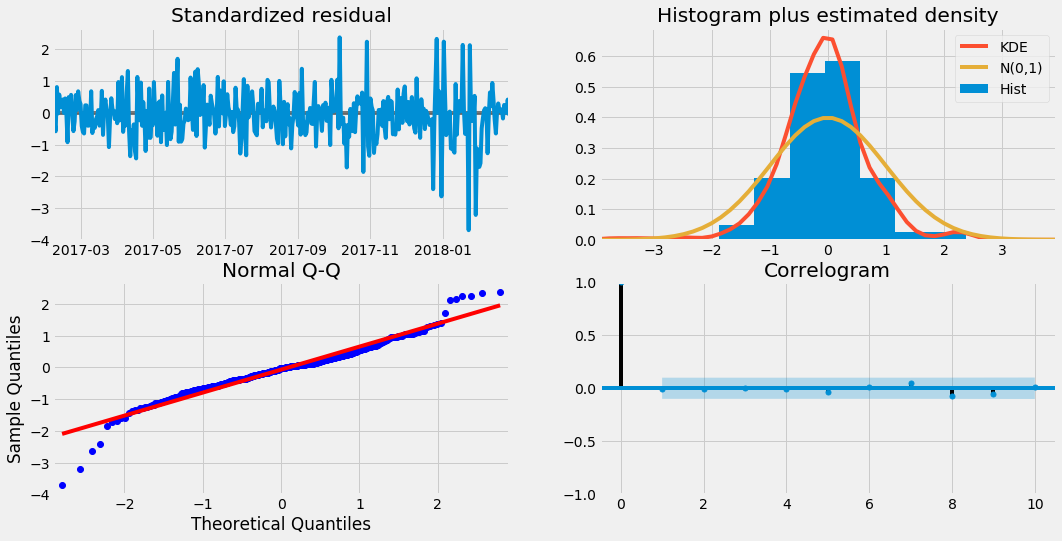

In [73]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

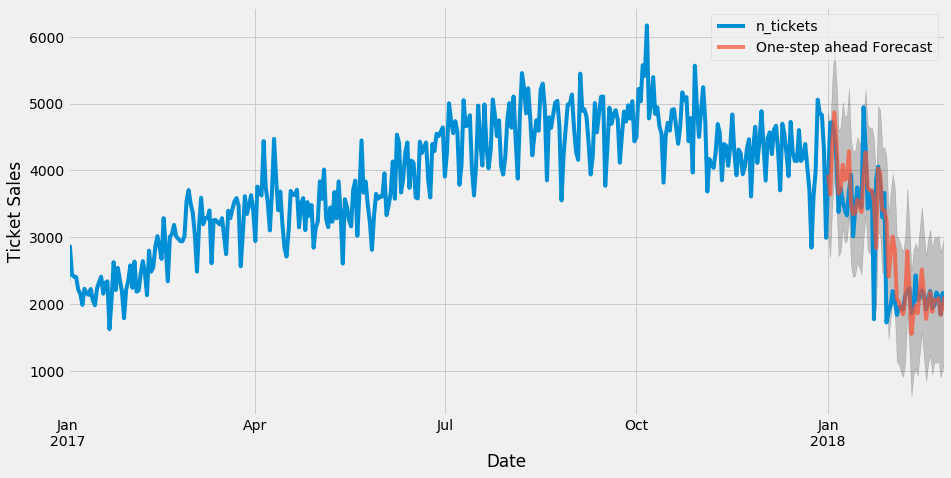

In [74]:
#Validation
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Ticket Sales')
plt.legend()

In [9]:
#Overall, our forecasts align with the true values very well, showing an downward trend starts from the beginning of the year and captured the seasonality toward the end of the year

In [86]:
y_forecasted = pred.predicted_mean
y_forecasted

2018-01-01    3934.340977
2018-01-02    3642.072320
2018-01-03    4437.789443
2018-01-04    4868.900450
2018-01-05    4415.983872
2018-01-06    3653.584284
2018-01-07    3715.292134
2018-01-08    4084.548978
2018-01-09    3860.102937
2018-01-10    3888.710860
2018-01-11    4287.740607
2018-01-12    3503.423210
2018-01-13    3341.683934
2018-01-14    3364.033602
2018-01-15    3565.033357
2018-01-16    3478.839754
2018-01-17    3378.737827
2018-01-18    3923.161897
2018-01-19    4269.716724
2018-01-20    3743.959826
2018-01-21    3699.823102
2018-01-22    3699.197837
2018-01-23    3540.808256
2018-01-24    2838.614180
2018-01-25    4028.834687
2018-01-26    3957.808192
2018-01-27    3405.506275
2018-01-28    3407.134416
2018-01-29    3262.177902
2018-01-30    2411.268446
2018-01-31    2742.188390
2018-02-01    3009.209111
2018-02-02    2811.109152
2018-02-03    2072.379335
2018-02-04    2035.316879
2018-02-05    1920.481028
2018-02-06    1847.924527
2018-02-07    2075.704113
2018-02-08  

In [89]:
y_truth = df['2018-01-01':]
y_actual = y_truth[y_truth.columns[0]]
y_actual

date
2018-01-01    3886
2018-01-02    4715
2018-01-03    4719
2018-01-04    4534
2018-01-05    4137
2018-01-06    3377
2018-01-07    3735
2018-01-08    3546
2018-01-09    3407
2018-01-10    3328
2018-01-11    3688
2018-01-12    3938
2018-01-13    3013
2018-01-14    3431
2018-01-15    3744
2018-01-16    3501
2018-01-17    3444
2018-01-18    4947
2018-01-19    4315
2018-01-20    3428
2018-01-21    3566
2018-01-22    3688
2018-01-23    1774
2018-01-24    3858
2018-01-25    4057
2018-01-26    3837
2018-01-27    3299
2018-01-28    3663
2018-01-29    1725
2018-01-30    1877
2018-01-31    1982
2018-02-01    2195
2018-02-02    2054
2018-02-03    1839
2018-02-04    1952
2018-02-05    1958
2018-02-06    1918
2018-02-07    2127
2018-02-08    2187
2018-02-09    2239
2018-02-10    1862
2018-02-11    1974
2018-02-12    2429
2018-02-13    2057
2018-02-14    2093
2018-02-15    2207
2018-02-16    2146
2018-02-17    1921
2018-02-18    2078
2018-02-19    2197
2018-02-20    1940
2018-02-21    1984
2018-02

In [ ]:
mse = ((y_forecasted - y_actual) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

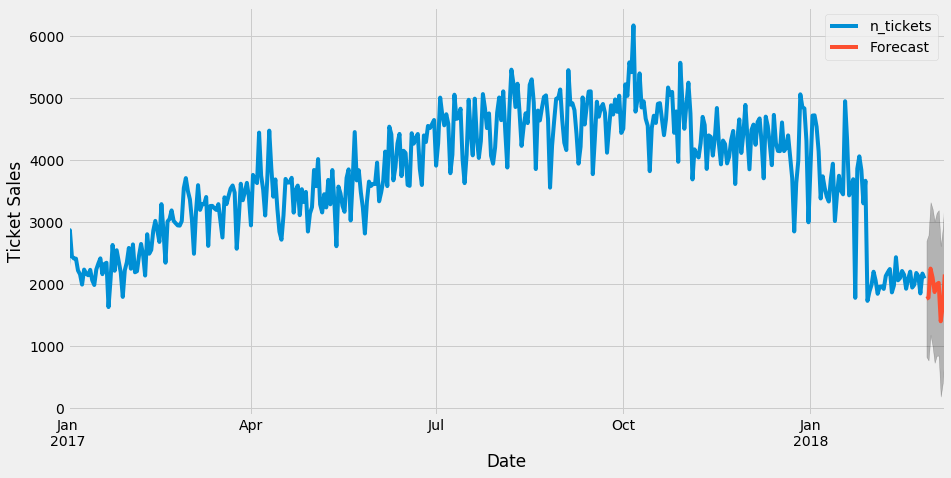

In [97]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Ticket Sales')
plt.legend()
plt.show()

In [98]:
print(pred_ci)

            lower n_tickets  upper n_tickets
2018-02-27       821.045737      2695.134603
2018-02-28       764.058015      2787.756755
2018-03-01      1174.761796      3316.725821
2018-03-02       992.118416      3211.104575
2018-03-03       725.800275      3008.334145
2018-03-04       838.482622      3143.333559
2018-03-05       841.920750      3189.495743
2018-03-06       181.110579      2609.923525
2018-03-07       400.731246      2893.016040
2018-03-08       863.070834      3439.877137


In [99]:
pred_uc.predicted_mean

2018-02-27    1758.090170
2018-02-28    1775.907385
2018-03-01    2245.743809
2018-03-02    2101.611495
2018-03-03    1867.067210
2018-03-04    1990.908091
2018-03-05    2015.708246
2018-03-06    1395.517052
2018-03-07    1646.873643
2018-03-08    2151.473986
Freq: D, dtype: float64

In [100]:
pred_uc.predicted_mean.astype('int')

2018-02-27    1758
2018-02-28    1775
2018-03-01    2245
2018-03-02    2101
2018-03-03    1867
2018-03-04    1990
2018-03-05    2015
2018-03-06    1395
2018-03-07    1646
2018-03-08    2151
Freq: D, dtype: int32

### Try to get the channel id and country

In [105]:
final = pd.DataFrame(pred_uc.predicted_mean.astype('int'))
final

,0
2018-02-27,1758
2018-02-28,1775
2018-03-01,2245
2018-03-02,2101
2018-03-03,1867
2018-03-04,1990
2018-03-05,2015
2018-03-06,1395
2018-03-07,1646
2018-03-08,2151


In [107]:
final.rename(columns={0:'n_tickets'}, inplace=True)
final

,n_tickets
2018-02-27,1758
2018-02-28,1775
2018-03-01,2245
2018-03-02,2101
2018-03-03,1867
2018-03-04,1990
2018-03-05,2015
2018-03-06,1395
2018-03-07,1646
2018-03-08,2151


In [134]:
data = pd.read_csv('try.csv')
data["channel_id"] = ""
data.head()
data

,date,n_tickets,channel_id
0,27/02/2019,1,
1,27/02/2019,1,
2,27/02/2019,1,
3,27/02/2019,1,
4,27/02/2019,1,
5,27/02/2019,1,
6,27/02/2019,1,
7,27/02/2019,1,
8,27/02/2019,1,
9,27/02/2019,1,


In [127]:
df2.isnull().sum()
df2['date'] = pd.to_datetime(df2['date'],errors='coerce')

In [129]:
df2['channel_id'] = df2['channel_id'].fillna(df2['channel_id'].median())

In [130]:
# data_final = pd.concat([df2,data],ignore_index = True)
# data_final = data_final.drop('id',axis=1)
# data_final

,channel_id,date,n_tickets
0,39.0,2017-06-12 00:00:00,2
1,35.0,2017-09-11 00:00:00,1
2,39.0,2017-07-05 00:00:00,1
3,39.0,2017-08-18 00:00:00,1
4,39.0,2017-11-23 00:00:00,2
5,39.0,2017-09-02 00:00:00,1
6,28.0,2017-07-03 00:00:00,1
7,39.0,2017-03-23 00:00:00,1
8,37.0,2017-10-02 00:00:00,1
9,28.0,2017-11-01 00:00:00,1


In [143]:
# 1048575 original rows
X_train = df2.drop(['channel_id','id'], axis=1)
y_train = df2['channel_id']
X_test = data.drop(['channel_id'], axis=1)
y_test = data['channel_id']
X_train.index = X_train['date']
X_train = X_train.drop(['date'], axis = 1)
X_test.index = X_test['date']
X_test = X_test.drop(['date'], axis = 1)
X_test.head()

,n_tickets
date,
27/02/2019,1
27/02/2019,1
27/02/2019,1
27/02/2019,1
27/02/2019,1


In [144]:
X_train.head()

,n_tickets
date,
2017-06-12,2
2017-09-11,1
2017-07-05,1
2017-08-18,1
2017-11-23,2


### Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, random_state = 100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [146]:
pred_channel = rf.predict(X_test)
pred_channel

array([39., 39., 39., ..., 39., 39., 39.])

In [147]:
X_test['channel_id'] = pred_channel

In [148]:
X_test.head()

,n_tickets,channel_id
date,,
27/02/2019,1,39.0
27/02/2019,1,39.0
27/02/2019,1,39.0
27/02/2019,1,39.0
27/02/2019,1,39.0


In [150]:
X_test['channel_id'].value_counts()

39.0    1750
Name: channel_id, dtype: int64

### Trial 2 using tickets grouped by a single channel

In [151]:
df2

,id,date,channel_id,n_tickets
0,10173,2017-06-12,39.0,2
1,95062,2017-09-11,35.0,1
2,171081,2017-07-05,39.0,1
3,122867,2017-08-18,39.0,1
4,107186,2017-11-23,39.0,2
5,171085,2017-09-02,39.0,1
6,169767,2017-07-03,28.0,1
7,80170,2017-03-23,39.0,1
8,154178,2017-10-02,37.0,1
9,3494,2017-11-01,28.0,1


In [155]:
df2['channel_id'].value_counts()

39.0    735293
28.0    123362
37.0    108364
35.0     59377
31.0      9031
40.0      4931
26.0      3620
29.0      1892
33.0       615
49.0       403
30.0       400
1.0        368
38.0       323
17.0       168
2.0         98
23.0        91
25.0        73
36.0        45
42.0        43
41.0        35
5.0         12
4.0          8
43.0         6
24.0         6
27.0         6
32.0         3
47.0         1
8.0          1
Name: channel_id, dtype: int64

In [184]:
# chose 39.0 because it has maximum values
channel1 = df2[df2['channel_id']==39.0]
channel1 = channel1.drop(['id','channel_id'],axis=1)
channel1.head()

,date,n_tickets
0,2017-06-12,2
2,2017-07-05,1
3,2017-08-18,1
4,2017-11-23,2
5,2017-09-02,1


In [185]:
channel1.shape

(735293, 2)

In [186]:
channel1['date'] = pd.to_datetime(channel1['date'],errors='coerce')
channel1 = channel1.groupby(['date']).sum()
channel1 = channel1.sort_values(by='date')
channel1.head()

,n_tickets
date,
2017-01-01,1584
2017-01-02,2191
2017-01-03,1822
2017-01-04,1701
2017-01-05,1758


In [187]:
channel1

,n_tickets
date,
2017-01-01,1584
2017-01-02,2191
2017-01-03,1822
2017-01-04,1701
2017-01-05,1758
2017-01-06,1584
2017-01-07,1518
2017-01-08,1378
2017-01-09,1647


,n_tickets
0,1584
1,2191
2,1822
3,1701
4,1758


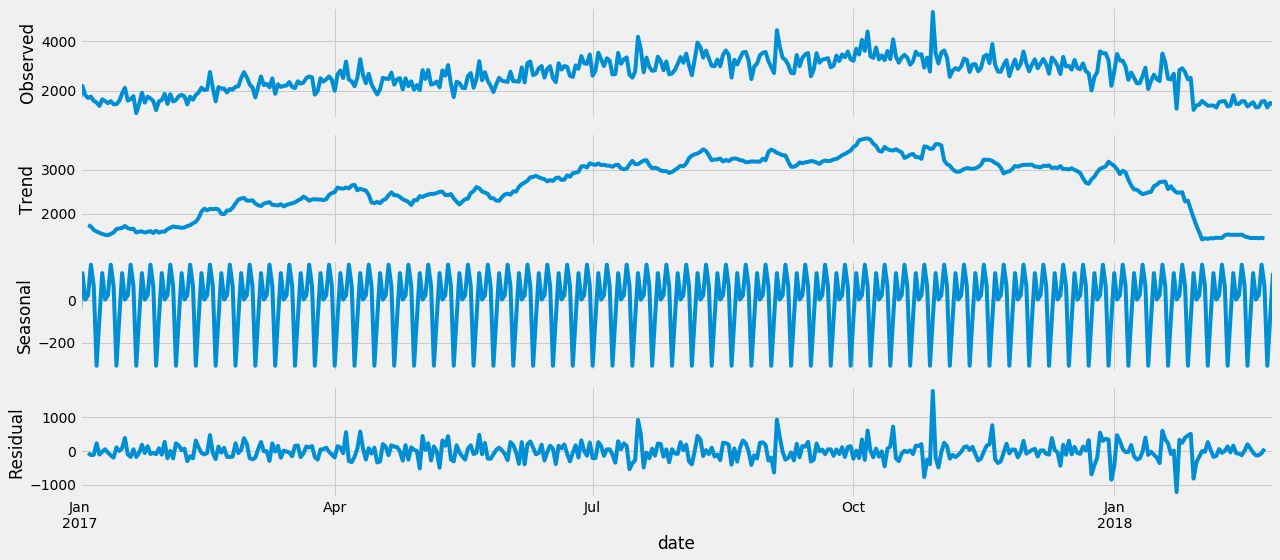

In [188]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(channel1, model='additive')
fig = decomposition.plot()
plt.show()

In [189]:
mod = sm.tsa.statespace.SARIMAX(channel1,
                                order=(10, 1, 10),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6025      6.615     -0.091      0.927     -13.568      12.363
ar.L2         -0.4227      5.015     -0.084      0.933     -10.252       9.407
ar.L3         -0.4805      3.867     -0.124      0.901      -8.060       7.099
ar.L4         -0.2947      3.716     -0.079      0.937      -7.578       6.988
ar.L5         -0.6148      3.245     -0.189      0.850      -6.975       5.745
ar.L6         -0.2842      4.069     -0.070      0.944      -8.260       7.691
ar.L7          0.4026      3.293      0.122      0.903      -6.053       6.858
ar.L8          0.2183      5.474      0.040      0.968     -10.510      10.947
ar.L9         -0.0175      3.230     -0.005      0.996      -6.348       6.313
ar.L10        -0.0270      0.724     -0.037      0.970      -1.447       1.393
ma.L1         -0.0674      6.616     -0.010      0.9

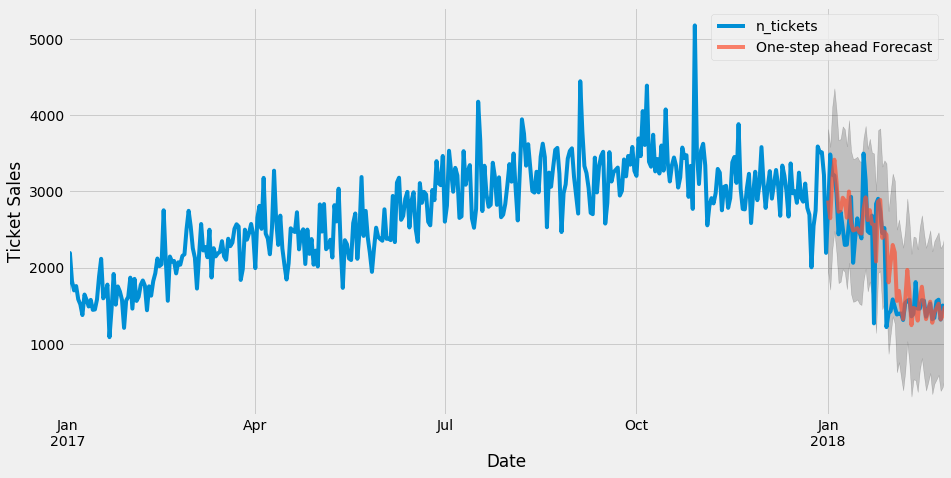

In [190]:
#Validation
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = channel1['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Ticket Sales')
plt.legend()

In [192]:
y_forecasted = pred.predicted_mean
y_truth = channel1['2018-01-01':]
y_actual = y_truth[y_truth.columns[0]]
mse = ((y_forecasted - y_actual) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of our forecasts is 150206.06
The Root Mean Squared Error of our forecasts is 387.56


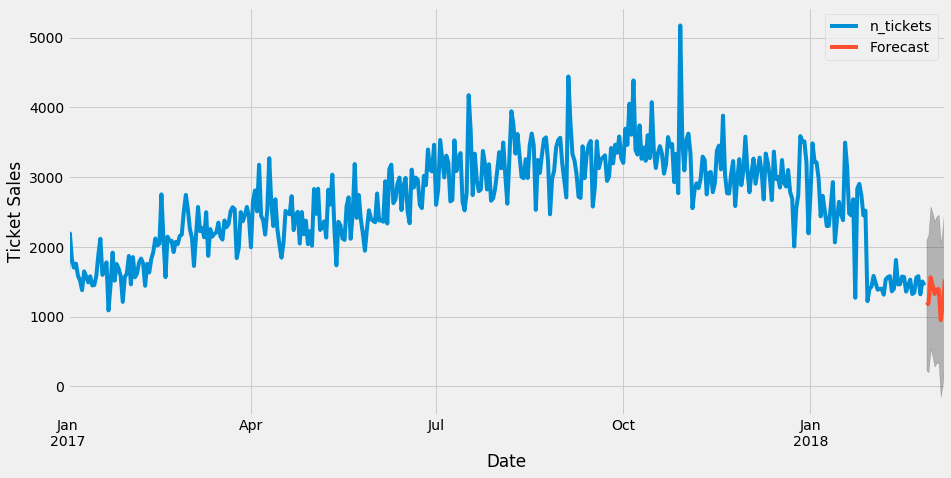

In [194]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = channel1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Ticket Sales')
plt.legend()
plt.show()

In [195]:
pred_uc.predicted_mean.astype('int')

2018-02-27    1163
2018-02-28    1189
2018-03-01    1563
2018-03-02    1453
2018-03-03    1322
2018-03-04    1388
2018-03-05    1392
2018-03-06     947
2018-03-07    1155
2018-03-08    1530
Freq: D, dtype: int32

### try with 1 channel and 1 country

In [197]:
df_allcols.head()

,id,date,channel_id,n_tickets,country_1,country_2
0,10173,6/12/2017,39.0,2,24,NaN
1,95062,9/11/2017,35.0,1,12,NaN
2,171081,7/5/2017,39.0,1,4,11
3,122867,8/18/2017,39.0,1,24,17
4,107186,11/23/2017,NaN,2,12,20


In [198]:
df_allcols['country_1'].value_counts()

24.0    579547
4.0     116211
11.0    102921
12.0     52523
27.0     25494
5.0      20411
23.0     19857
9.0      17712
21.0     14401
26.0     13119
20.0      7929
19.0      7161
29.0      7106
32.0      5405
14.0      4495
7.0       4290
15.0      2891
31.0      2583
8.0       2412
16.0      2111
17.0      1513
28.0      1058
12         323
18         312
17         312
13         308
4          307
6          303
16         302
11         301
19         301
9          299
14         298
20         297
8          294
xx         294
1          292
2          290
3          286
7          285
15         280
0          145
22.0         1
Name: country_1, dtype: int64

In [206]:
channel = df_allcols[df_allcols['channel_id']==39]
channel1_country1 = channel[channel['country_1']==24]
channel1_country1.head()

,id,date,channel_id,n_tickets,country_1,country_2
0,10173,6/12/2017,39.0,2,24,NaN
3,122867,8/18/2017,39.0,1,24,17
7,80170,3/23/2017,39.0,1,24,NaN
11,106906,1/25/2018,39.0,1,24,20
19,132783,1/18/2018,39.0,1,24,NaN


In [207]:
channel1_country1 = channel1_country1.drop(['id','country_2','channel_id','country_1'],axis=1)

In [208]:
channel1_country1.head()

,date,n_tickets
0,6/12/2017,2
3,8/18/2017,1
7,3/23/2017,1
11,1/25/2018,1
19,1/18/2018,1


In [209]:
channel1_country1['date'] = pd.to_datetime(channel1_country1['date'],errors='coerce')
channel1_country1 = channel1_country1.groupby(['date']).sum()
channel1_country1 = channel1_country1.sort_values(by='date')
channel1_country1.head()

,n_tickets
date,
2017-01-01,707
2017-01-02,921
2017-01-03,792
2017-01-04,755
2017-01-05,799


In [210]:
mod = sm.tsa.statespace.SARIMAX(channel1_country1,
                                order=(10, 1, 10),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4777      1.995     -0.240      0.811      -4.387       3.432
ar.L2         -0.5157      2.525     -0.204      0.838      -5.465       4.434
ar.L3         -0.1341      2.973     -0.045      0.964      -5.961       5.693
ar.L4         -0.3436      2.503     -0.137      0.891      -5.249       4.562
ar.L5         -0.4264      2.253     -0.189      0.850      -4.843       3.990
ar.L6         -0.5222      2.115     -0.247      0.805      -4.668       3.624
ar.L7          0.3951      2.238      0.177      0.860      -3.992       4.782
ar.L8         -0.0225      1.427     -0.016      0.987      -2.819       2.773
ar.L9          0.0865      0.924      0.094      0.925      -1.724       1.897
ar.L10        -0.1653      0.375     -0.441      0.660      -0.901       0.570
ma.L1         -0.2210      1.992     -0.111      0.9

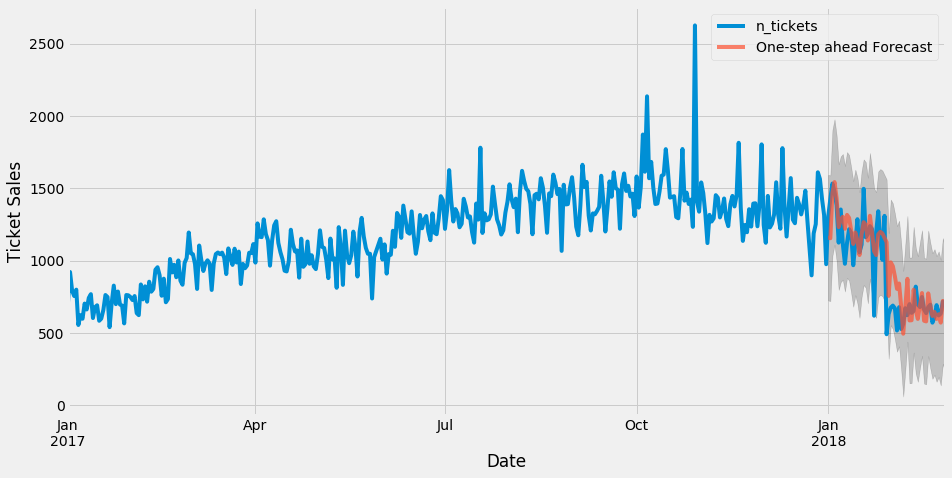

In [211]:
#Validation
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = channel1_country1['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Ticket Sales')
plt.legend()

In [214]:
y_forecasted = pred.predicted_mean
y_truth = channel1_country1['2018-01-01':]
y_actual = y_truth[y_truth.columns[0]]
mse = ((y_forecasted - y_actual) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of our forecasts is 28857.2
The Root Mean Squared Error of our forecasts is 169.87


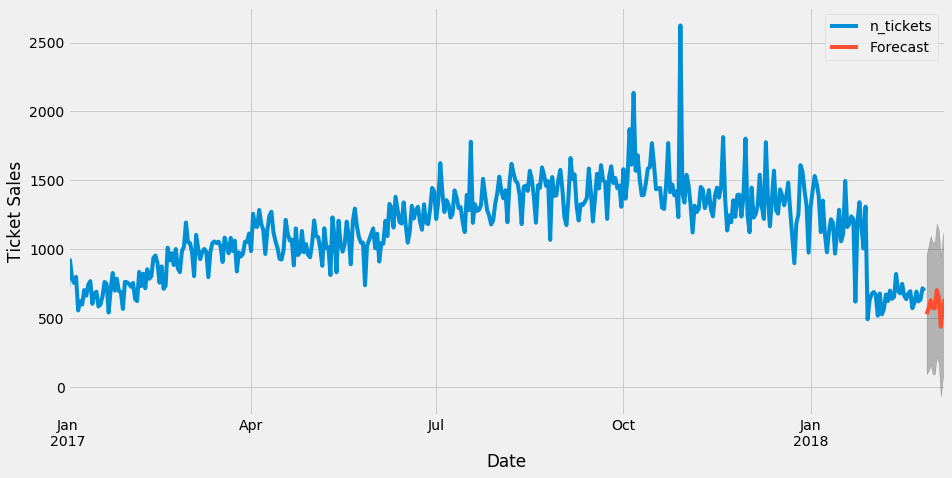

In [215]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = channel1_country1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Ticket Sales')
plt.legend()
plt.show()

In [216]:
pred_uc.predicted_mean.astype('int')

2018-02-27    527
2018-02-28    570
2018-03-01    629
2018-03-02    571
2018-03-03    571
2018-03-04    703
2018-03-05    651
2018-03-06    437
2018-03-07    583
2018-03-08    638
Freq: D, dtype: int32